<a href="https://colab.research.google.com/github/jack-swiney/CS-5262-Assignment-8/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%cd drive/MyDrive/Colab\ Notebooks/Assignment\ 8/

/content/drive/MyDrive/Colab Notebooks/Assignment 8


## Part 1: Linear Regression with 1 Variable

In [5]:
food_truck_data = np.loadtxt("data/food_truck_data.txt",
                 delimiter=",")

In [32]:
def calc_y_hat(thetas, train_data):
    y_hat = 0
    for index in range(len(thetas)):
        if index > 0:
            y_hat += thetas[index] * train_data[index-1]
        else:
            y_hat += thetas[index]

    return y_hat

In [43]:
def gradient_descent(training_data, thetas, alpha=0.005):
    """Return thetas, error"""
    gradients = np.zeros(len(thetas))
    for row in training_data:
        y_hat = calc_y_hat(thetas, row)
        for i in range(len(gradients)):
            if i > 0:
                gradients[i] += alpha * (row[-1] - y_hat) * row[i-1]
            else:
                gradients[i] += alpha * (row[-1] - y_hat)

    for i, (theta, gradient) in enumerate(zip(thetas, gradients)):
      thetas[i] = theta + gradient

    return thetas, gradients[0]

In [58]:
# set initial parameters
thetas = [-0.5, 0.5]
old_thetas = thetas.copy()
alpha = 5e-6

# prepare training
total_epochs = 250
error_traj = [0] * total_epochs

# perform training
for epoch in range(total_epochs):
    thetas, epoch_error = gradient_descent(food_truck_data, thetas, alpha)
    # store a history of errors
    error_traj[epoch] = epoch_error

Text(0.5, 1.0, 'Training of Food Truck Data model')

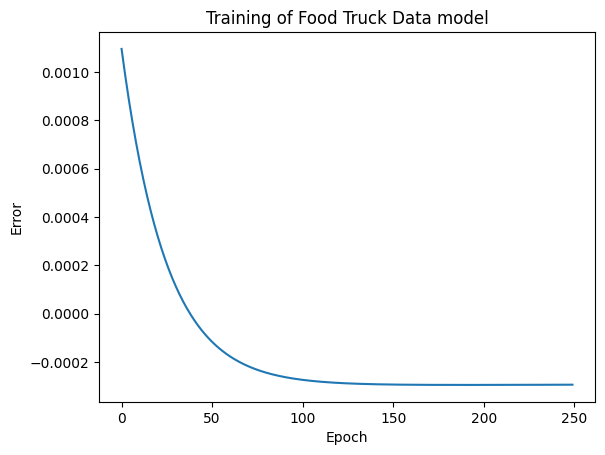

In [59]:
plt.plot(error_traj)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Food Truck Data model')

Text(0.5, 1.0, 'Comparison of pre- vs post-model training')

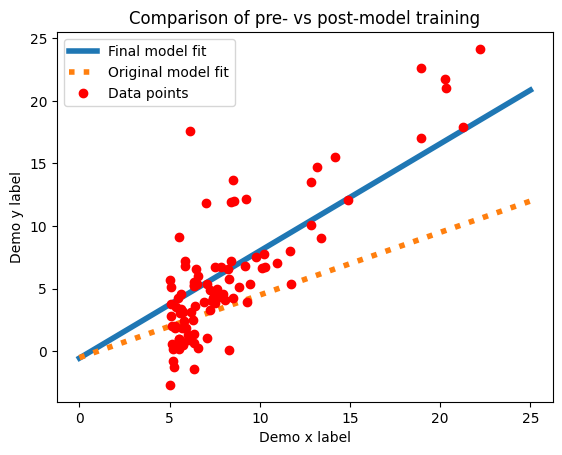

In [62]:
# Let's look at the actual least squares
lin_pts = np.linspace(0, 25, 25) # gives you 25 values between [0, 5]
mdl_pts = thetas[0] + lin_pts * thetas[1]
plt.plot(lin_pts, mdl_pts, linewidth=4, label='Final model fit')
plt.legend()

# Let's look at the original least squares
orig_mdl_pts = old_thetas[0] + lin_pts * old_thetas[1]
plt.plot(lin_pts, orig_mdl_pts, ':', linewidth=4, label='Original model fit')
plt.legend()

# Let's plot the original points
plt.plot(food_truck_data[:,0], food_truck_data[:,1], 'ro', label='Data points') # 'ro' for red, circle
plt.legend()
plt.xlabel('Demo x label')
plt.ylabel('Demo y label')
plt.title('Comparison of pre- vs post-model training')

### Single-Variable Model Explanation
The model gradient-descent function takes in 3 variables:
1. Array of data - NumPy array from provided data.
1. Array of thetas - Initialized these to random non-zero values.
1. Alpha Value - I arrived at 5e-6 by trial-and-error. Having to large of an alpha caused data overflow. Too small took too many epochs to train.

The gradient-descent function is run iteratively for 250 epochs. This number was also trial-and error, starting with 100, then 1000, then finally narrowing it down to 250. Ideally, this would be in the form of a while loop, with some sort of threshold to exit the loop.


## Part 2: Linear Regression with Multiple Variables

In [83]:
from sklearn.preprocessing import scale as sklearn_scale

In [85]:
housing_price_data = np.loadtxt("data/housing_price_data.txt",
                                delimiter=",")
housing_price_scaled = sklearn_scale(housing_price_data)

Text(0.5, 1.0, 'Training of Housing Price Data Model')

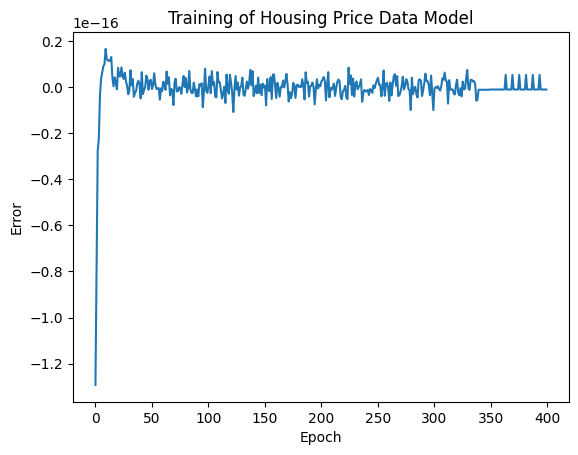

In [100]:
# set initial parameters
thetas = np.arange(housing_price_scaled.shape[-1], dtype=float)
old_thetas = thetas.copy()
alpha = 5e-3

# prepare training
total_epochs = 400
error_traj = [0] * total_epochs

# perform training
for epoch in range(total_epochs):
    thetas, epoch_error = gradient_descent(housing_price_scaled, thetas, alpha)
    # store a history of errors
    error_traj[epoch] = epoch_error

plt.plot(error_traj)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Housing Price Data Model')

### Multiple-Variable Model Explanation
The model gradient-descent function takes in 3 variables:
1. Array of data - NumPy array from provided data.
1. Array of thetas - Initialized these to an arange of the same length as columns in the training data.
1. Alpha Value - I arrived at 5e-3 by trial-and-error. Having to large of an alpha had a weird effect, where the error wa 0 for almost 400 epochs, then started increasing. Too small took too many epochs to train.

The gradient-descent function is run iteratively for 400 epochs. This number was also trial-and error, starting with 100, then 1000, then finally narrowing it down to 400. Ideally, this would be in the form of a while loop, with some sort of threshold to exit the loop. However, the cost function graph doesn't actually level out, it looks like it approaches a steady error, but then has waves with a fixed amplitude.
